In [3]:
!pip install gower
!pip install scikit-learn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#import the dataset
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project 1/migraine_symptom_classification.csv")

In [6]:
# Convert all columns to categorical except 'Age', 'Duration', and 'Frequency'
for col in data.columns:
    if col not in ['Age', 'Duration', 'Frequency']:
        data[col] = data[col].astype('category')

# Check for duplicated rows
has_duplicates = data.duplicated().any()
num_duplicates = data.duplicated().sum()
print(f"Has duplicated rows: {has_duplicates}")
print(f"Number of duplicated rows: {num_duplicates}")

# Drop duplicated rows
data = data.drop_duplicates()
print(f"Number of duplicated rows: {data.duplicated().sum()}")

print(data.shape)

# Check for missing values
num_missing = data.isnull().sum().sum()
print(f"Total missing values: {num_missing}")

Has duplicated rows: True
Number of duplicated rows: 6
Number of duplicated rows: 0
(394, 24)
Total missing values: 0


In [7]:
# Define the mapping
type_mapping = {
    'Typical aura with migraine': 'Typical Aura with and without Headache',
    'Typical aura without migraine': 'Typical Aura with and without Headache',
    'Migraine without aura': 'Migraine Without Aura',
    'Familial hemiplegic migraine': 'Hemiplegic Migraine Variants',
    'Sporadic hemiplegic migraine': 'Hemiplegic Migraine Variants',
    'Basilar-type aura': 'Basilar',
    'Other': 'Basilar'
}


# Create new column with grouped types
data['Type_grouped'] = data['Type'].map(type_mapping)

# Check the counts of each new group
print(data['Type_grouped'].value_counts())

Type_grouped
Typical Aura with and without Headache    261
Migraine Without Aura                      60
Hemiplegic Migraine Variants               38
Basilar                                    35
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['Type_grouped'], random_state=123)

Outlier_Label
0    315
Name: count, dtype: int64

Number of outliers detected: 0


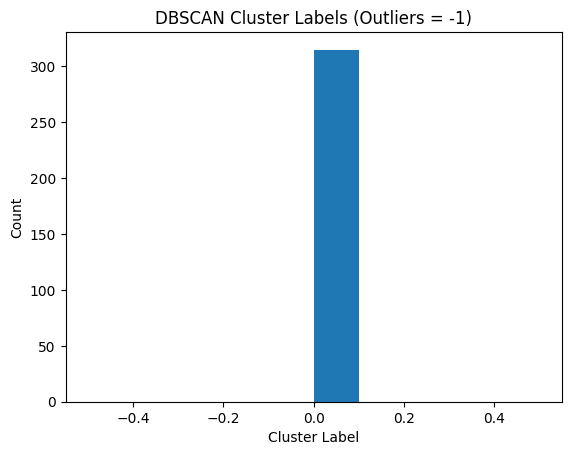

In [10]:
# Required imports
import pandas as pd
import numpy as np
import gower
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Use your cleaned, grouped dataset (before encoding)
# Make sure to drop columns not needed
data_for_outlier = train_data.drop(columns=['Type', 'Type_grouped']).copy()

# Convert all 'category' columns to 'object' so Gower can process them
for col in data_for_outlier.select_dtypes(include='category').columns:
    data_for_outlier[col] = data_for_outlier[col].astype(object)

# Compute Gower distance matrix
gower_dist = gower.gower_matrix(data_for_outlier)

# Run DBSCAN on Gower distance matrix
db = DBSCAN(metric='precomputed', eps=0.3, min_samples=5)
labels = db.fit_predict(gower_dist)

# Append labels back to your data
data_for_outlier['Outlier_Label'] = labels

# Show how many outliers were detected
print(data_for_outlier['Outlier_Label'].value_counts())

# Outliers are labeled as -1
outliers = data_for_outlier[data_for_outlier['Outlier_Label'] == -1]
print(f"\nNumber of outliers detected: {outliers.shape[0]}")

# Optional: visualize outlier distribution (if you want)
plt.hist(data_for_outlier['Outlier_Label'])
plt.title("DBSCAN Cluster Labels (Outliers = -1)")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()